In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('supermarket_Sales.csv')

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cost of goods sold,Gross margin percentage,Gross income,Customer stratification rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
import pandas as pd

df = pd.read_csv('supermarket_Sales.csv')
df.head()

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time


df = df.dropna(subset=['Invoice ID', 'Date', 'Total'])
df['Customer stratification rating'] = df['Customer stratification rating'].fillna(df['Customer stratification rating'].mean())  # Fill missing ratings with mean

df = df.drop_duplicates()


df = df[(df['Total'] >= 0) & (df['Quantity'] >= 0)]

df.to_csv('cleaned_invoice_dataset.csv', index=False)


<ipython-input-18-afebb25709c7>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time


In [ ]:
df = pd.read_csv('/content/cleaned_invoice_dataset.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cost of goods sold,Gross margin percentage,Gross income,Customer stratification rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cost of goods sold,Gross margin percentage,Gross income,Customer stratification rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


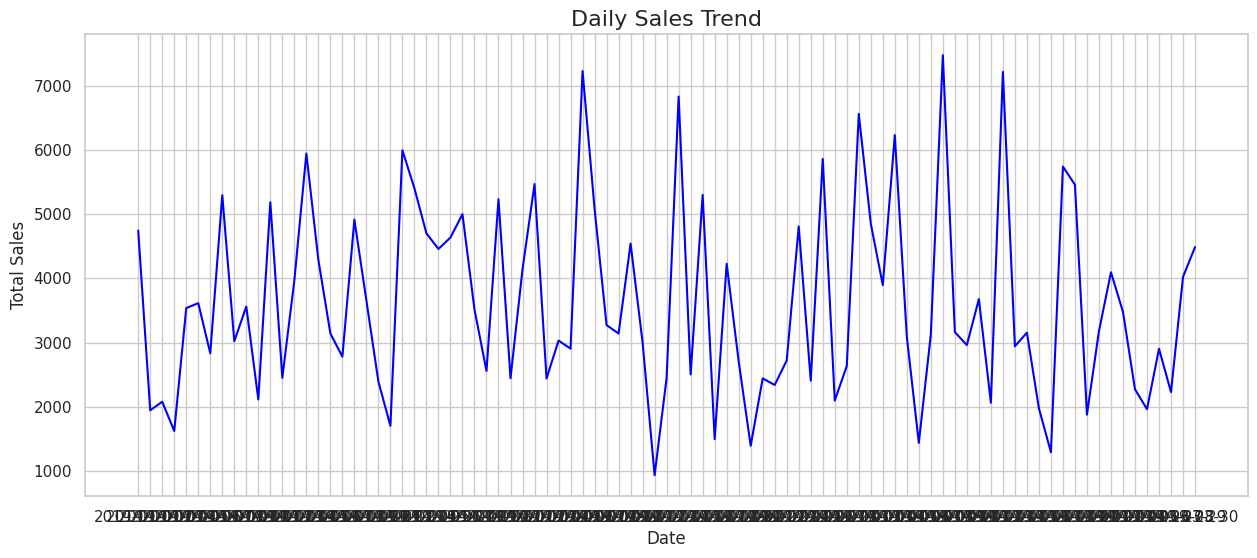

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(15, 6))
daily_sales = df.groupby('Date')['Total'].sum()
plt.plot(daily_sales.index, daily_sales.values, color='blue')
plt.title('Daily Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.show()

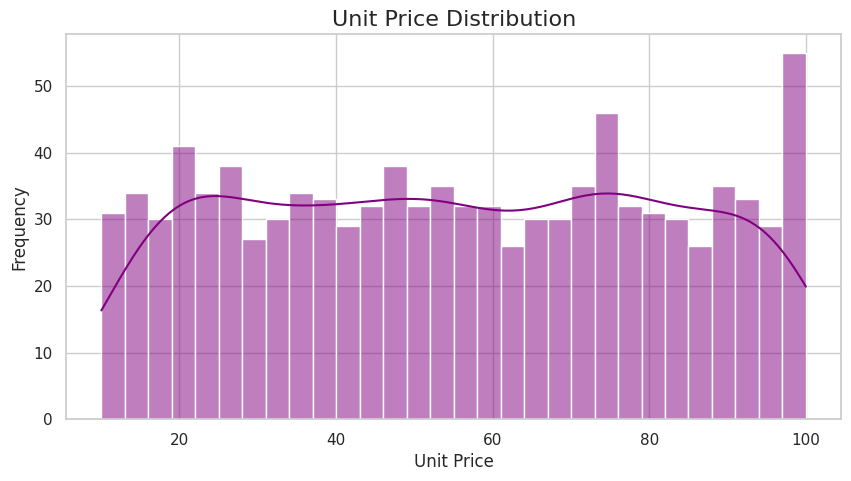

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Unit price'], bins=30, kde=True, color='purple')
plt.title('Unit Price Distribution', fontsize=16)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<ipython-input-23-56cc059677c1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer type', y='Total', data=df, palette='coolwarm')


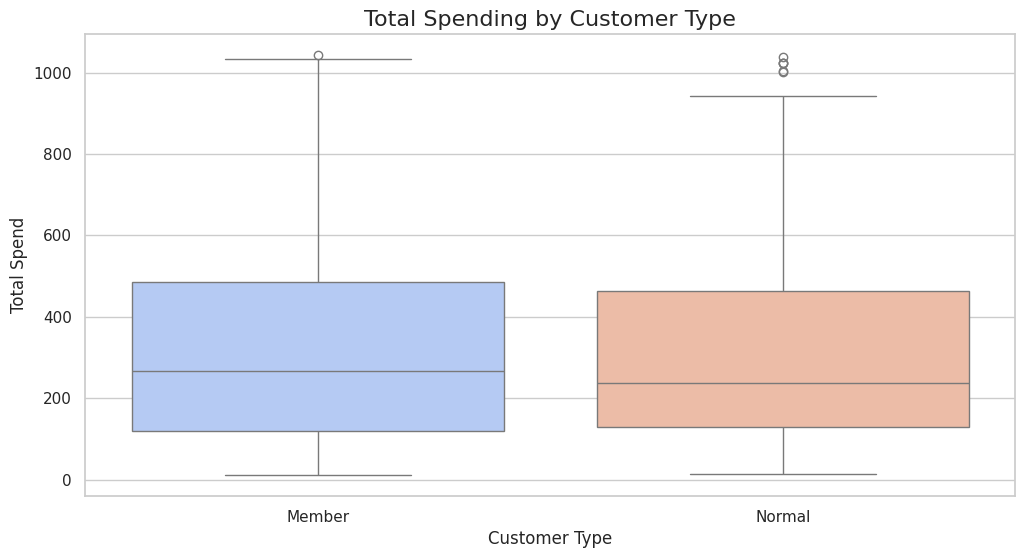

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Customer type', y='Total', data=df, palette='coolwarm')
plt.title('Total Spending by Customer Type', fontsize=16)
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Total Spend', fontsize=12)
plt.show()

<ipython-input-24-b0e987d68423>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_sales.index, y=payment_sales.values, palette='Set2')


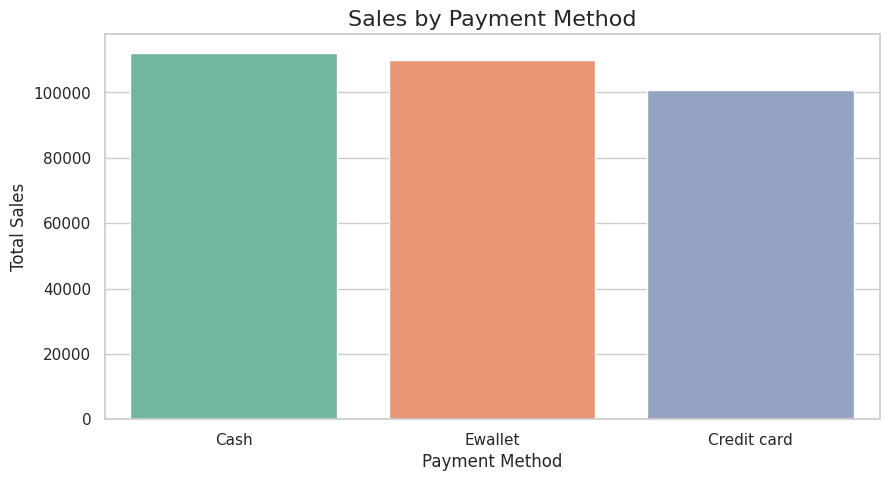

In [ ]:
plt.figure(figsize=(10, 5))
payment_sales = df.groupby('Payment')['Total'].sum().sort_values(ascending=False)
sns.barplot(x=payment_sales.index, y=payment_sales.values, palette='Set2')
plt.title('Sales by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

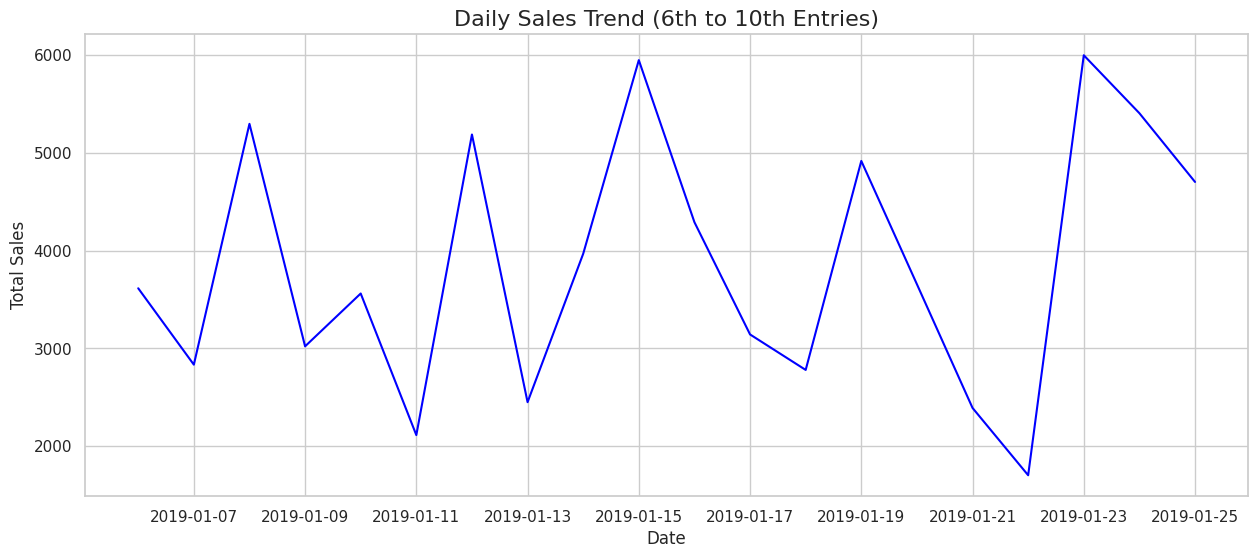

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

daily_sales = df.groupby('Date')['Total'].sum()


daily_sales_subset = daily_sales.iloc[5:25]

plt.figure(figsize=(15, 6))
plt.plot(daily_sales_subset.index, daily_sales_subset.values, color='blue')
plt.title('Daily Sales Trend (6th to 10th Entries)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

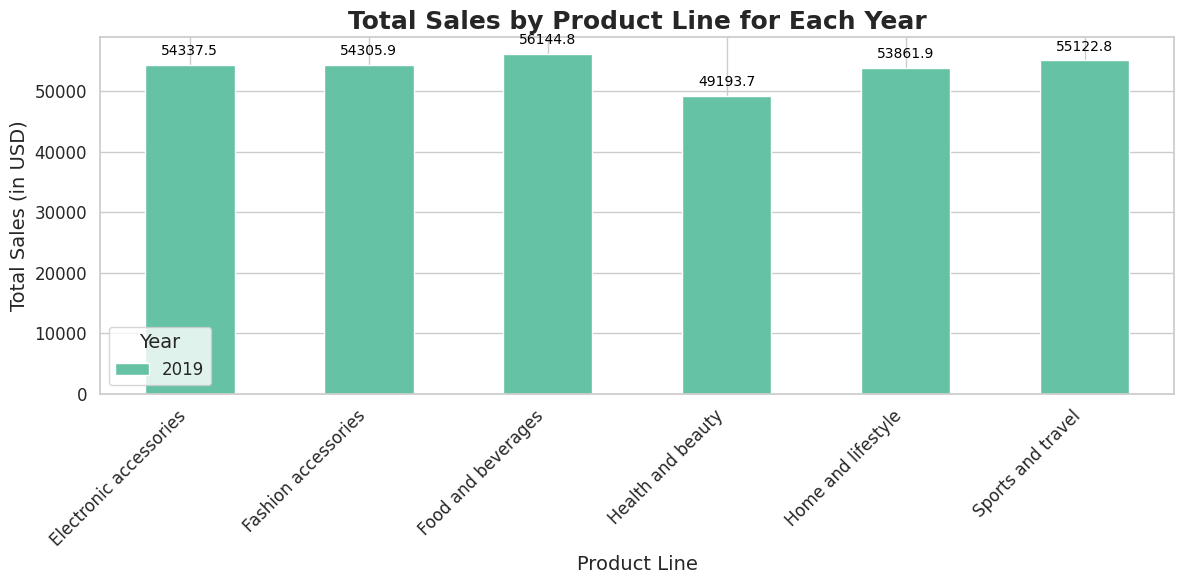

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/cleaned_invoice_dataset.csv')  # Replace with the actual path to your CSV file

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group by 'Product line' and 'Year', then sum the 'Total' sales for each product line
sales_by_product_year = df.groupby(['Product line', 'Year'])['Total'].sum().unstack().fillna(0)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sales_by_product_year.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='Set2')

# Adding titles and labels
plt.title('Total Sales by Product Line for Each Year', fontsize=18, fontweight='bold')
plt.xlabel('Product Line', fontsize=14)
plt.ylabel('Total Sales (in USD)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Year", fontsize=12, title_fontsize=14)

# Adding data labels on top of the bars
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, color='black', padding=5)

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()


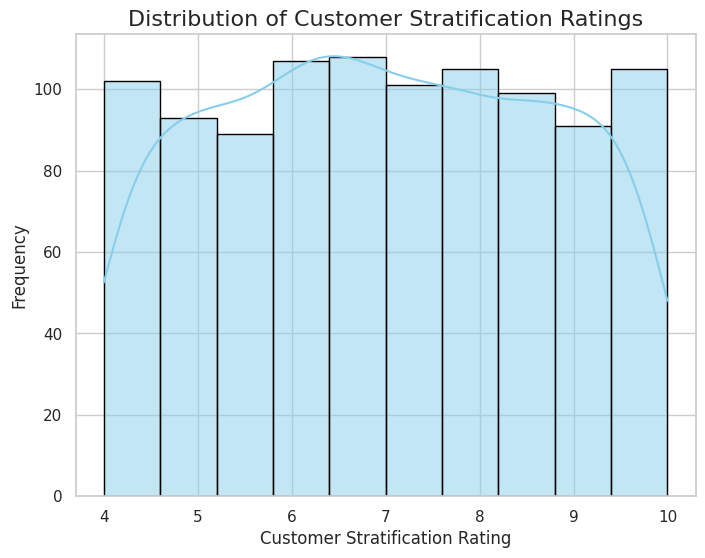

Customer Stratification Rating Distribution:
Customer stratification rating
6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64

Mean Rating: 6.9727
Median Rating: 7.0

Targeted Improvements Needed: Ratings are mixed. Focus on understanding the concerns of both satisfied and unsatisfied customers.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the dataset in the variable 'df'
# You can use the following code to create a histogram of the 'Customer stratification rating'

plt.figure(figsize=(8, 6))
sns.histplot(df['Customer stratification rating'], kde=True, bins=10, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Customer Stratification Ratings', fontsize=16)
plt.xlabel('Customer Stratification Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

# Evaluate the distribution and give insights
rating_counts = df['Customer stratification rating'].value_counts()
mean_rating = df['Customer stratification rating'].mean()
median_rating = df['Customer stratification rating'].median()

print("Customer Stratification Rating Distribution:")
print(rating_counts)

print("\nMean Rating:", mean_rating)
print("Median Rating:", median_rating)

# Based on the mean and median, you can draw insights
if mean_rating < 4:
    print("\nImprovement Needed: Most customers seem to be unsatisfied. Consider investigating areas of dissatisfaction.")
elif mean_rating > 7:
    print("\nNo Immediate Improvement Needed: Most customers seem satisfied, but continuous efforts are required to maintain high satisfaction.")
else:
    print("\nTargeted Improvements Needed: Ratings are mixed. Focus on understanding the concerns of both satisfied and unsatisfied customers.")


<ipython-input-43-2afb94ad33ba>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=branch_sales.index, y=branch_sales.values, palette='viridis')


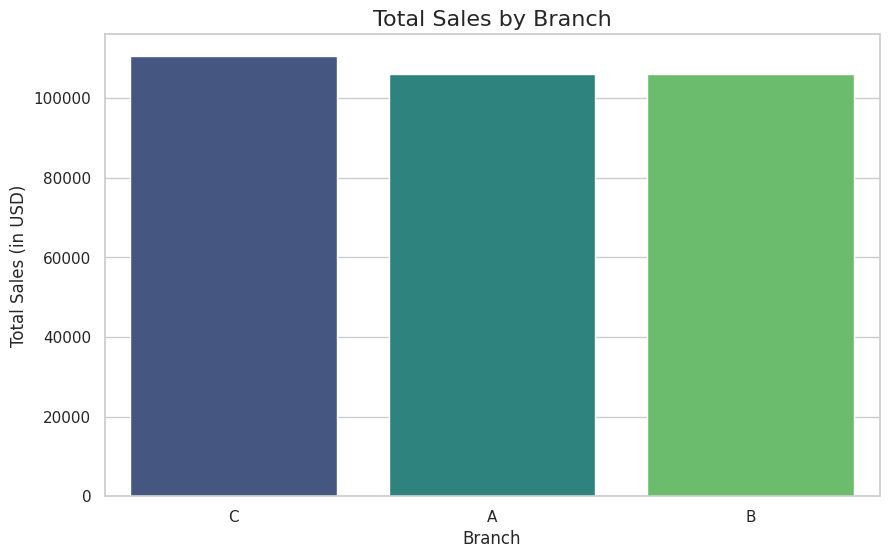

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your dataset and is already loaded

# Group by branch and sum the total sales for each branch
branch_sales = df.groupby('Branch')['Total'].sum().sort_values(ascending=False)

# Set up the plot size
plt.figure(figsize=(10, 6))

# Plot the total sales by branch
sns.barplot(x=branch_sales.index, y=branch_sales.values, palette='viridis')

# Add labels and title
plt.title('Total Sales by Branch', fontsize=16)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Total Sales (in USD)', fontsize=12)

# Show the plot
plt.show()
